In [1]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

%matplotlib inline

In [4]:
# reading the image
image = io.imread('./Olly_000.png')

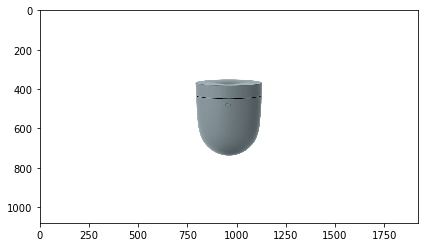

In [5]:
io.imshow(image);

In [8]:
image.shape

(1080, 1920, 4)

In [10]:
# preprocessing
rows, cols = image.shape[0], image.shape[1]
image = image.reshape(rows * cols, 4)

In [11]:
print(image.shape)
print(image[:5])

(2073600, 4)
[[ 76 105 113   0]
 [ 76 105 113   0]
 [ 76 105 113   0]
 [ 76 105 113   0]
 [ 76 105 113   0]]


In [26]:
# modelling
kMeans = KMeans(n_clusters = 32)
kMeans.fit(image)

KMeans(n_clusters=32)

In [27]:
# centers
centers = np.asarray(kMeans.cluster_centers_, dtype = np.uint8)
centers

array([[ 75, 105, 113,   0],
       [106, 118, 122, 255],
       [148, 160, 166, 254],
       [ 83,  92,  95, 254],
       [179, 192, 199,  50],
       [126, 140, 145, 255],
       [ 19,  26,  29, 254],
       [180, 193, 200, 145],
       [ 93, 103, 107, 255],
       [164, 176, 183, 254],
       [135, 148, 154, 254],
       [111, 123, 128, 255],
       [ 97, 108, 113, 255],
       [ 88,  97, 101, 255],
       [119, 132, 136, 255],
       [167, 180, 186, 204],
       [167, 180, 186,  94],
       [ 38,  46,  49, 254],
       [130, 144, 150, 255],
       [156, 169, 175, 254],
       [144, 156, 162, 215],
       [  1,   3,   3, 255],
       [101, 113, 117, 255],
       [186, 200, 207,   5],
       [173, 185, 192, 254],
       [176, 189, 196,  19],
       [140, 152, 158, 255],
       [185, 198, 204,  92],
       [123, 136, 141, 255],
       [ 60,  69,  72, 254],
       [160, 173, 179, 152],
       [115, 128, 132, 255]], dtype=uint8)

In [28]:
# labels 
labels = np.asarray(kMeans.labels_, dtype = np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
labels

(2073600,)
(1080, 1920)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [29]:
# reconstructing
newImage = np.zeros((rows, cols, 4), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # assinging every pixel the rgb color of their label's center 
            newImage[i, j, :] = centers[labels[i, j], :]
io.imsave('olly-compressed.png', newImage);